# Week 2 Task 6
Make a jupyter notebook that uses mdtraj to 
	a) read in the md trajectory of beta amyloid
	b) compute the end-end distance at each time, and the radius of gyration at each time
	c) plot the end-end distance and radius of gyration vs time on the same plot, clearly labeled (same y axis is fine this time)
	d) plot a normalized histogram of end-end distance and another of radius of gyration

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [40]:
pwd

'/scratch/work/courses/CHEM-GA-2671-2023fa/students/axe1/comp-lab-class-2023/Week2'

#### a) read in the md trajectory of beta amyloid

In [41]:
traj = md.load_xtc('Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='Data/1hz3_T310.start.nowater.gro')

#### 	b) compute the end-end distance at each time, and the radius of gyration at each time

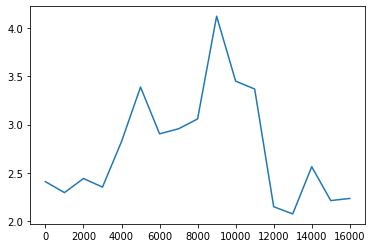

In [43]:
# compute the distance between the first and last atom
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)

##plot distance vs time
plt.plot(traj.time, dist)

In [44]:
# radius of gyration
r_gyr = md.compute_rg(traj)
print(r_gyr)

[0.85057444 1.00091706 1.00509146 0.9700538  1.03096215 1.08965024
 1.06154491 1.01728751 1.0467843  1.25890696 1.03388204 1.18969875
 1.03686539 1.03002704 1.00622438 1.02566947 1.03948413]


#### c) plot the end-end distance and radius of gyration vs time on the same plot, clearly labeled (same y axis is fine this time)

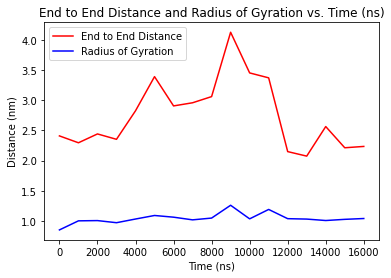

In [45]:
plt.plot(traj.time, dist, color = "r", label = "End to End Distance")
plt.plot(traj.time, r_gyr, color = "b", label = "Radius of Gyration")

plt.xlabel("Time (ns)")
plt.ylabel("Distance (nm)")
plt.title("End to End Distance and Radius of Gyration vs. Time (ns)")
plt.legend()

plt.savefig("Figures/beta_amyloid_end_end_dist_r_gyr.pdf", dpi=300)  

#### d) plot a normalized histogram of end-end distance and another of radius of gyration

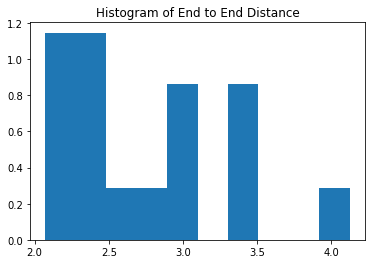

In [48]:
#End-End Distance Histogram
plt.hist(dist, density = True) 
plt.title("Histogram of End to End Distance")
plt.savefig("Figures/beta_amyloid_hist_end_end_dist.pdf", dpi=300)  

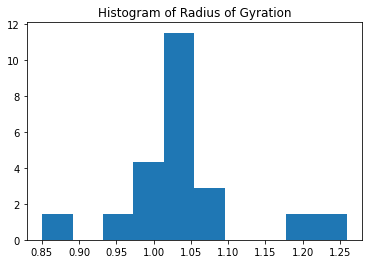

In [49]:
#Radius of Gyration Histogram
plt.hist(r_gyr, density = True)
plt.title("Histogram of Radius of Gyration")
plt.savefig("Figures/beta_amyloid_hist_r_gyr.pdf", dpi=300)  